In [1]:
cd ..

/home/g.samarth/starspots


In [119]:
run main.py

Reading FITS: KIC = 002013754; filter = 20d ...


100%|██████████| 1700/1700 [05:09<00:00,  5.50it/s]


(1700, 8)


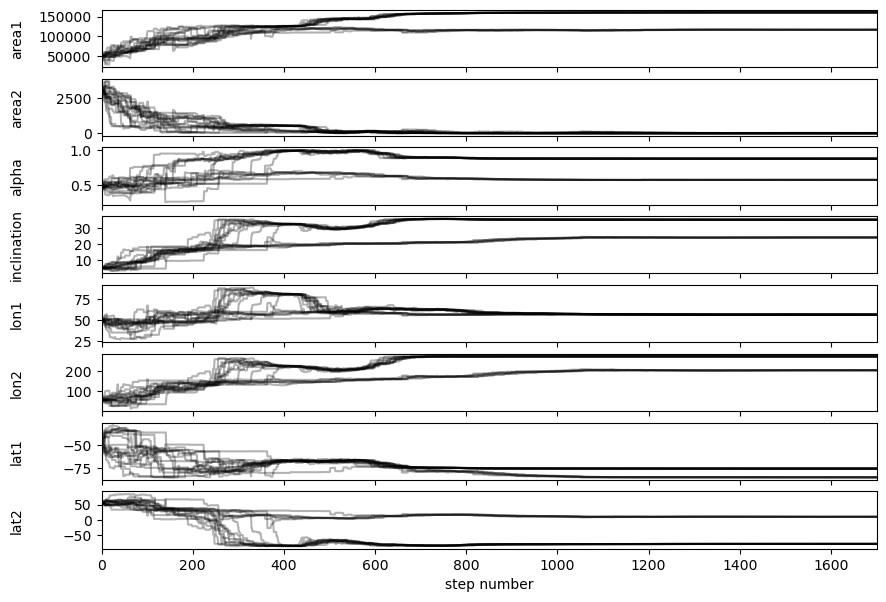

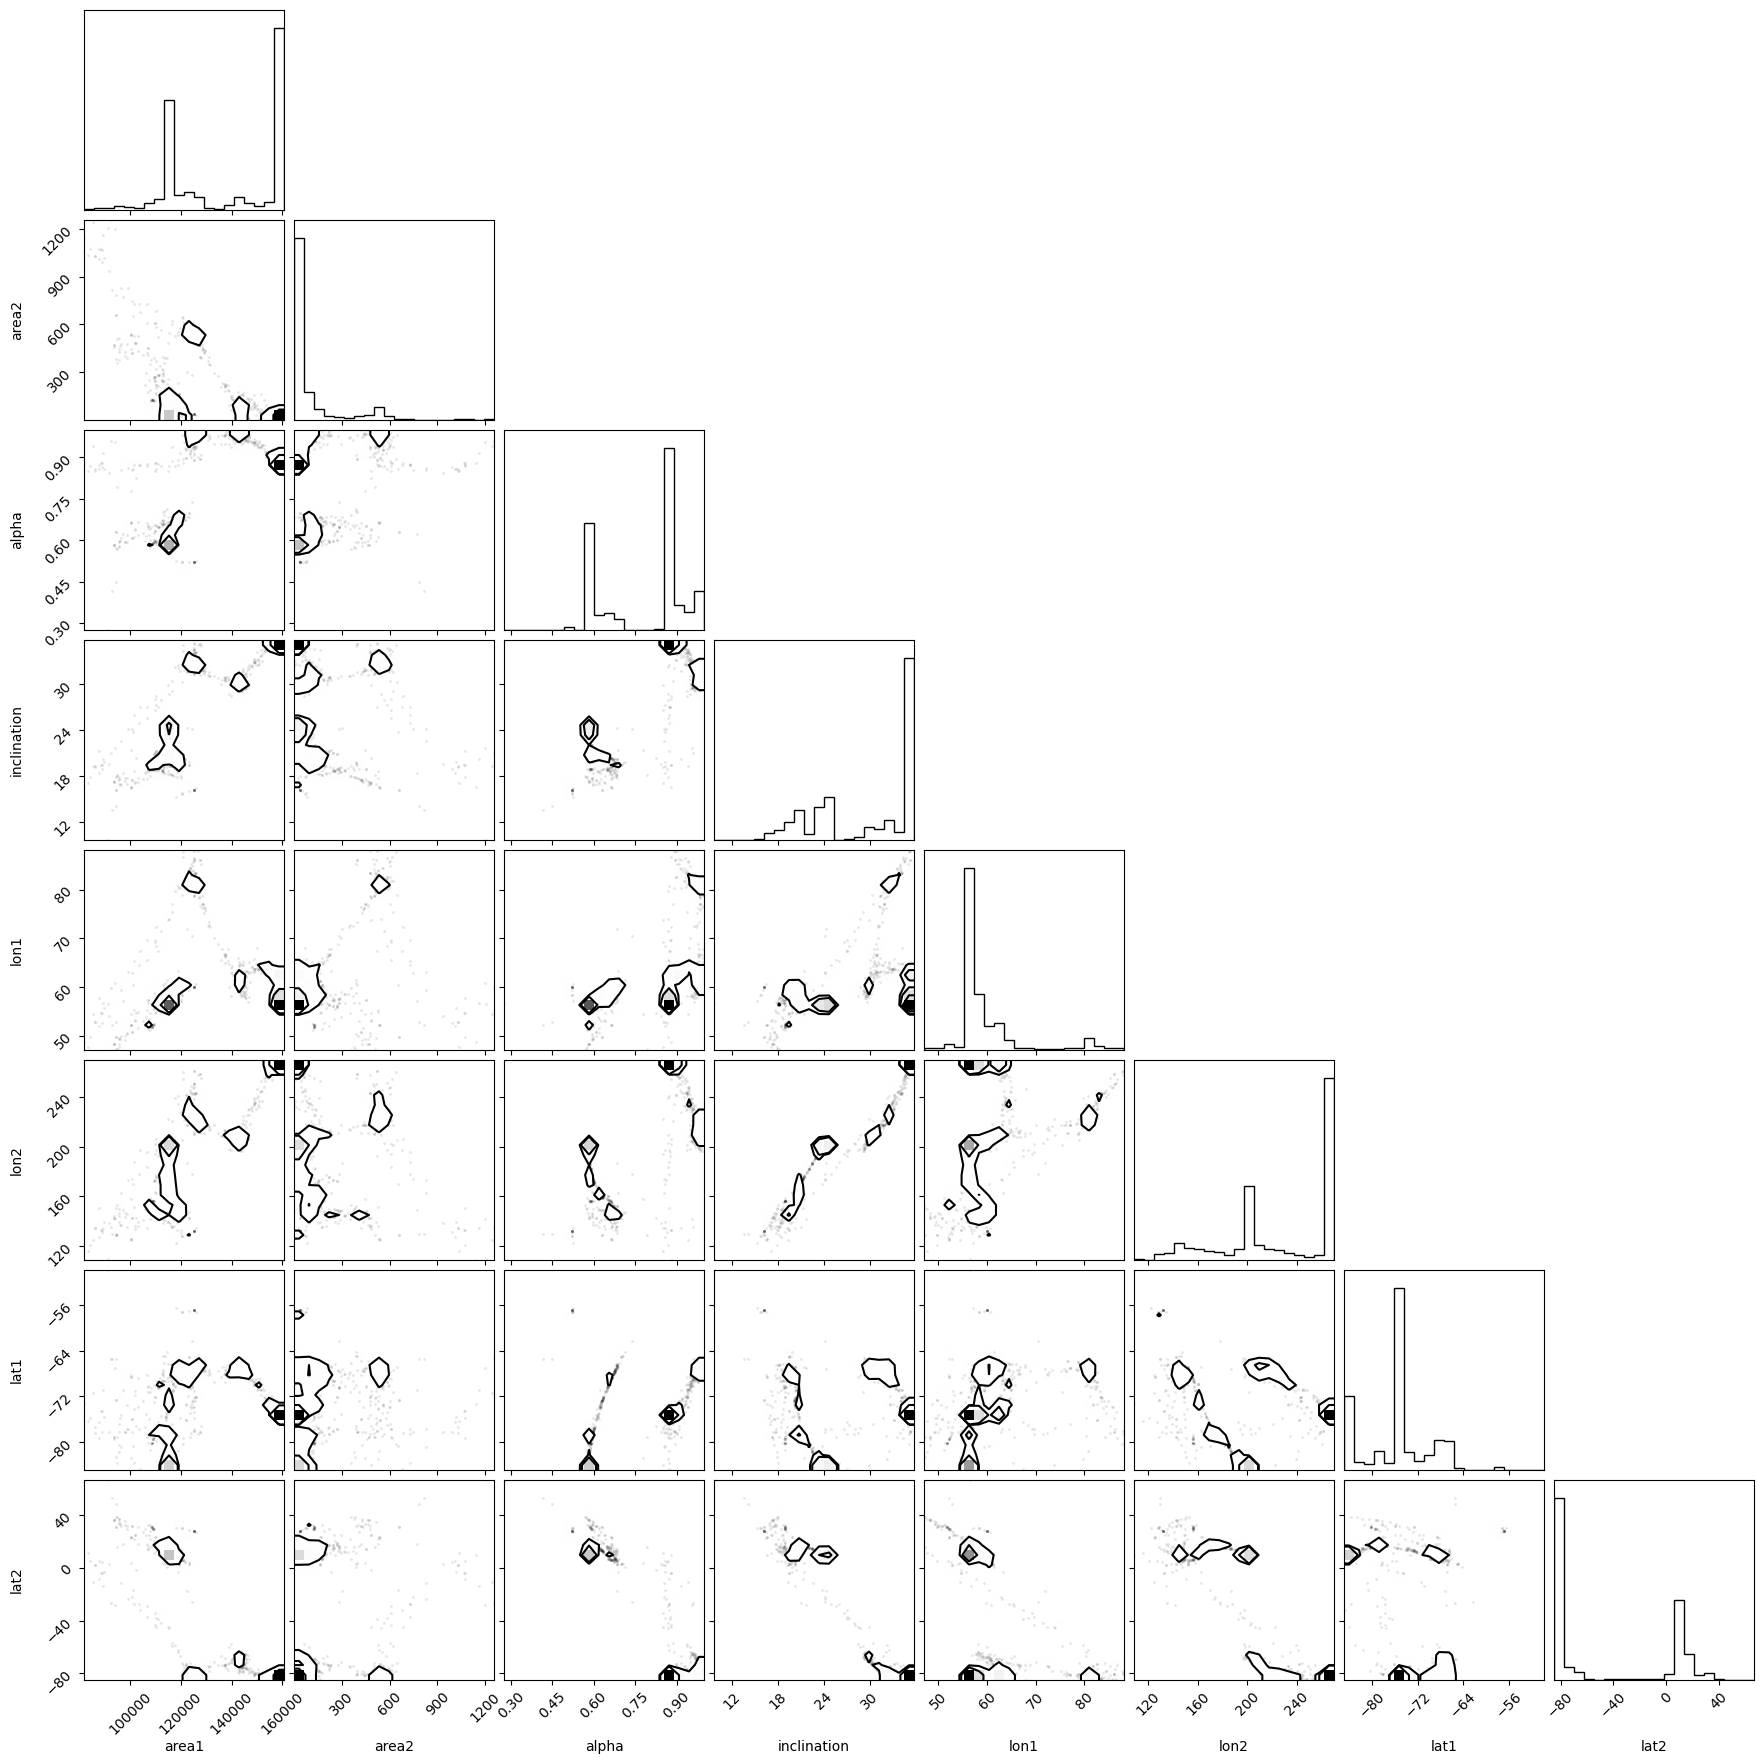

In [120]:
plt.show()

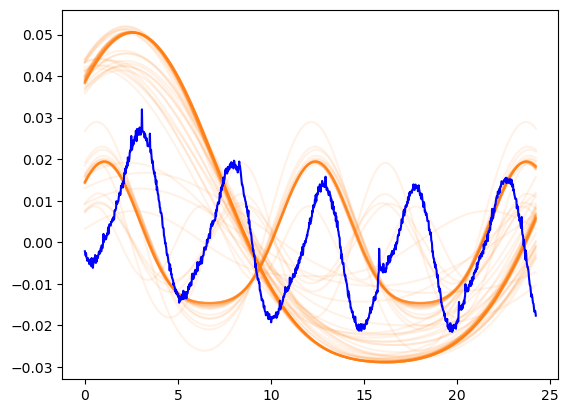

In [122]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    model = get_model(sample)
    plt.plot(lc_time, model, "C1", alpha=0.1)
plt.plot(lc_time, lc_data/50*1.60, 'b')
#plt.ylim([1.2*lc_data.min(), 1.2*lc_data.max()])
plt.show()

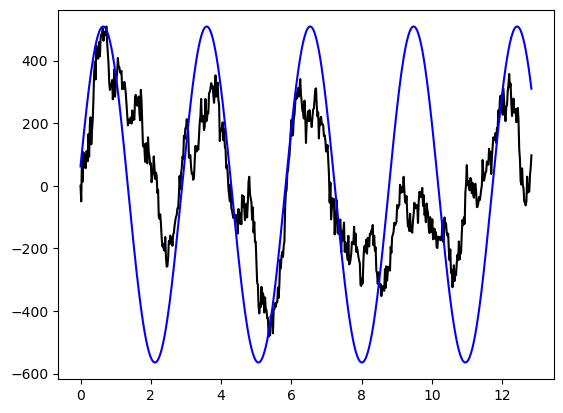

In [69]:
star = ST(inclination=12.5, no_evolution=True, max_area1=3.5e4, Io=(abs(lc_data).max())**2,
  total_time=lc_time[-1]/365.25, time_step=time_step, time_arr=lc_time/365.25, prot=p_rot,
         lon1=np.radians(10.), 
         lon2=np.radians(130.),
          lat1=np.radians(15.),
          lat2=np.radians(125.))
star.simulate_spots()
star.compute_light_curve()
plt.figure()
plt.plot(lc_time, lc_data, 'k', label='data')
plt.plot(lc_time, star.light_curve - star.light_curve.mean(), 'b', label='model')
plt.show()